In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import uuid

from bloom import init, BloomFilter

In [2]:
def plot_fpr(fpr, xvals, xlabel):
    plt.figure(figsize=(15, 10))
    plt.plot(xvals, fpr)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel("False positive rate", fontsize=16)
    plt.show()

In [3]:
def result_multiple_hashes():
    bloom_filter_config = init(num_hash_functions=100)

    dataset = []
    dataset_exists = {}
    dataset_not_exists = {}

    for _ in range(500):
        uuid_val = str(uuid.uuid4())
        dataset.append(uuid_val)
        dataset_exists[uuid_val] = True

    for _ in range(500):
        uuid_val = str(uuid.uuid4())
        dataset.append(uuid_val)
        dataset_not_exists[uuid_val] = False

    fpr = []
    for i in tqdm(range(1, len(bloom_filter_config.hash_fns_seed))):
        bloom = BloomFilter(10000, bloom_filter_config)

        for key in dataset_exists:
            bloom.add(key, i)

        false_positive = 0
        for key in dataset:
            _, _, exists = bloom.exists(key, i)
            if exists:
                if key in dataset_not_exists:
                    false_positive += 1

        fpr.append(float(false_positive) / float(len(dataset)))
        
    return fpr

  0%|          | 0/99 [00:00<?, ?it/s]

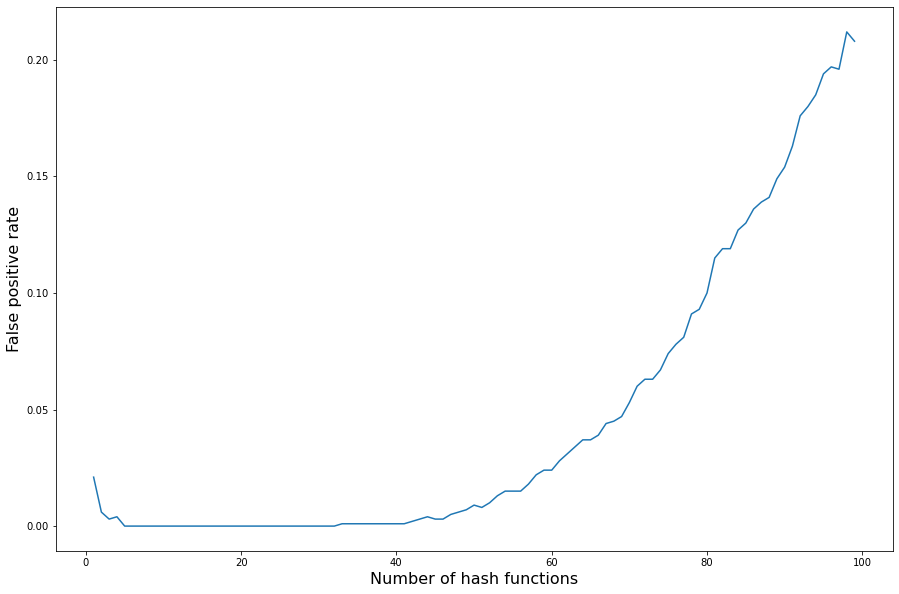

In [4]:
fpr = result_multiple_hashes()
plot_fpr(fpr, xvals=list(range(1, 100)), xlabel="Number of hash functions")

In [5]:
def result_multiple_sizes():
    bloom_filter_config = init(num_hash_functions=1)

    dataset = []
    dataset_exists = {}
    dataset_not_exists = {}

    for _ in range(500):
        uuid_val = str(uuid.uuid4())
        dataset.append(uuid_val)
        dataset_exists[uuid_val] = True

    for _ in range(500):
        uuid_val = str(uuid.uuid4())
        dataset.append(uuid_val)
        dataset_not_exists[uuid_val] = False

    fpr = []
    for i in tqdm(range(1000, 10000, 200)):
        bloom = BloomFilter(i, bloom_filter_config)

        for key in dataset_exists:
            bloom.add(key, 1)
            
        false_positive = 0
        for key in dataset:
            _, _, exists = bloom.exists(key, 1)
            if exists:
                if key in dataset_not_exists:
                    false_positive += 1
                    
        fpr.append(float(false_positive) / float(len(dataset)))
        
    return fpr

  0%|          | 0/45 [00:00<?, ?it/s]

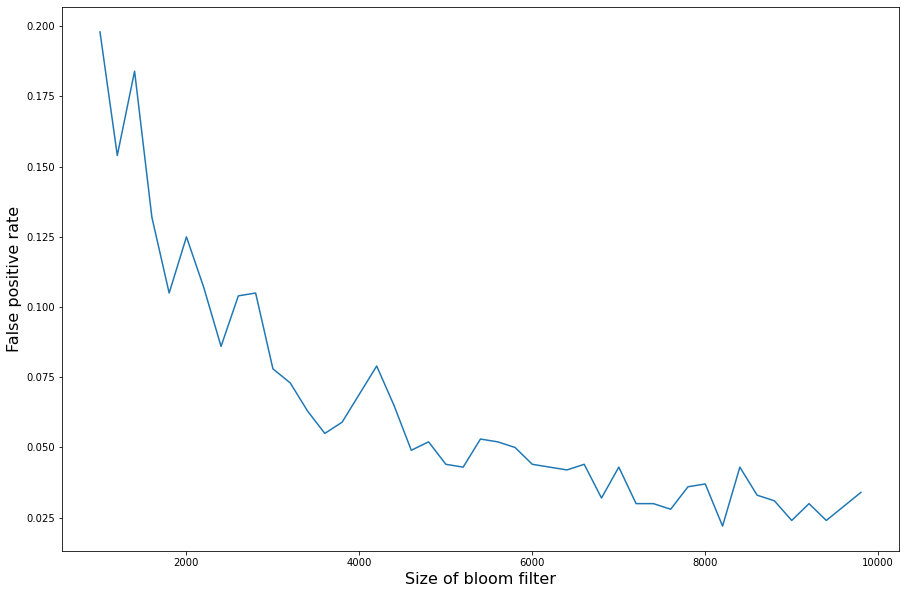

In [6]:
fpr = result_multiple_sizes()
plot_fpr(fpr, xvals=list(range(1000, 10000, 200)), xlabel="Size of bloom filter")